# Text mining

In [2]:
from textblob import TextBlob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tjsra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjsra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tjsra\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# open 20th-century txt file

In [4]:
myfile = open('20th-century_article_wiki.txt', encoding='utf-8') 

In [5]:
# Import txt file

with open('20th-century_article_wiki.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [6]:
# Sentence tokenization 

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchAppearanceCreate accountLog inPersonal tools Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1The world at the beginning of the century1.1.1"The war to end all wars": World War I (1914â€“1918)1.1.2The Russian Revolution and Communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939â€“1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.

In [7]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'WikipediaJump', 'to', 'contentMain', 'menuMain', 'menumove', 'to', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'to', 'sidebarhide', '(', 'Top', ')', '1Historic', 'events', 'in', 'the', '20th', 'centuryToggle', 'Historic', 'events', 'in', 'the', '20th', 'century', 'subsection1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1.1.2The', 'Russian', 'Revolution', 'and', 'Communism1.2Between', 'the', 'wars1.2.1Economic', 'depression1.2.2The', 'rise'

In [8]:
# Create frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4897 samples and 20427 outcomes>


In [9]:
dist_words.most_common(10)

[('.', 1274),
 ('the', 1095),
 (',', 989),
 ('of', 604),
 ('and', 398),
 ('to', 326),
 ('The', 302),
 ('[', 302),
 (']', 302),
 ('in', 290)]

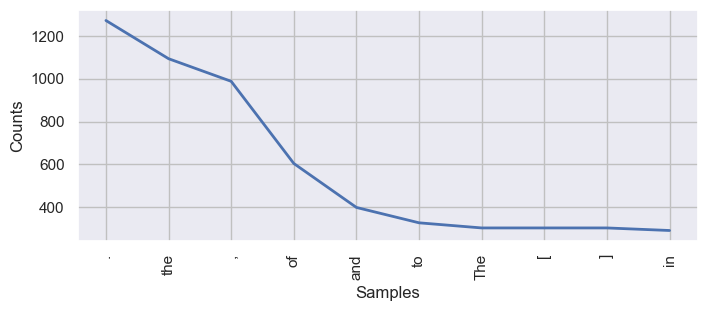

In [10]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

# Remove stopwords

In [12]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'haven', 'each', 'this', 'was', 'about', 'it', 'had', 'does', 'down', 'while', 'with', "hasn't", 'mustn', 'd', 'those', 'most', 'you', 'just', 'once', 'am', 'who', 'o', 'on', 'ain', 'up', 'a', 'themselves', 'weren', "weren't", 'of', "you'll", 'here', 'they', 'after', 'your', 'over', "don't", 'himself', 'being', 've', 'before', 'shan', 'from', 'below', 'ours', "isn't", 'there', 'that', "it's", 'were', "she's", 'than', 'won', 'is', 'again', 'me', 'under', 'more', 'ma', 'yours', 'has', 'against', "needn't", 'because', 'yourself', 'myself', 'don', 'itself', 'other', 'hadn', 'or', 'to', 'our', 'which', 'couldn', 'an', 'only', 'can', 'my', 'we', 'i', 't', 'should', 'he', 'into', "mightn't", "wouldn't", 'hasn', 'in', "should've", 'having', 'do', 'yourselves', 'where', 'm', "mustn't", 'own', "didn't", 'between', 'll', 'now', 'doing', "wasn't", 'theirs', 'ourselves', "doesn't", 'through', 'if', 'shouldn', "aren't", 'until', 'their', 'whom', 'mightn', 'be', "you're", 'did', "shouldn't", 'but', 

In [13]:
# Removing stopwords in sentences

# filtered_sent = []
# for word in tokenized_sent:
#     if word not in stop_words:
#         filtered_sent.append(word)
# print("Tokenized Sentence:", tokenized_sent)
# print("Filterd Sentence:", filtered_sent)

In [14]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [15]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'WikipediaJump',
 'contentMain',
 'menuMain',
 'menumove',
 'sidebarhide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usDonate',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSearchSearchAppearanceCreate',
 'accountLog',
 'inPersonal',
 'tools',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'moreContributionsTalkContentsmove',
 'sidebarhide',
 '(',
 'Top',
 ')',
 '1Historic',
 'events',
 '20th',
 'centuryToggle',
 'Historic',
 'events',
 '20th',
 'century',
 'subsection1.1The',
 'world',
 'beginning',
 'century1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914â€',
 '“',
 '1918',
 ')',
 '1.1.2The',
 'Russian',
 'Revolution',
 'Communism1.2Between',
 'wars1.2.1Economic',
 'depression1.2.2The',
 'rise',
 'dictatorship1.3Global',
 'war',
 ':',
 'World',
 'War',
 'II'

In [16]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4794 samples and 15769 outcomes>


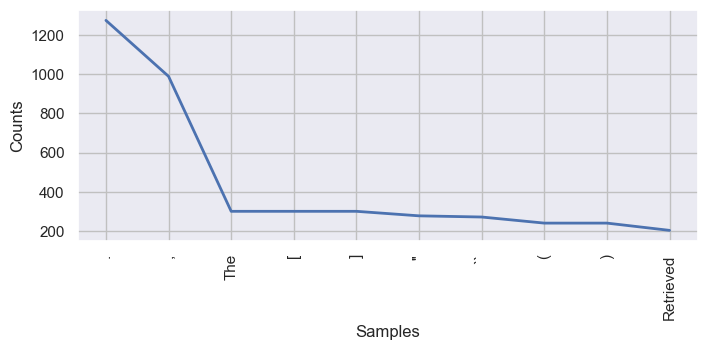

In [17]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

In [18]:
dist_words_filter

FreqDist({'.': 1274, ',': 989, 'The': 302, '[': 302, ']': 302, "''": 279, '``': 273, '(': 242, ')': 242, 'Retrieved': 205, ...})

In [19]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [20]:
sans_punc

'  Key    events      th    century         WikipediaJump    contentMain    menuMain    menumove    sidebarhide    Navigation    Main    pageContentsCurrent    eventsRandom    articleAbout    WikipediaContact    usDonate    Contribute    HelpLearn    editCommunity    portalRecent    changesUpload    fileSearchSearchAppearanceCreate    accountLog    inPersonal    tools    Create    account    Log    Pages    logged    editors    learn    moreContributionsTalkContentsmove    sidebarhide         Top          Historic    events      th    centuryToggle    Historic    events      th    century    subsection   The    world    beginning    century               The    war    end    wars               World    War    I                                          The    Russian    Revolution    Communism   Between    wars     Economic    depression     The    rise    dictatorship   Global    war         World    War    II                                          The    war    Europe     Blitzkrieg

In [21]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['Key', 'events', 'th', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'th', 'centuryToggle', 'Historic', 'events', 'th', 'century', 'subsection', 'The', 'world', 'beginning', 'century', 'The', 'war', 'end', 'wars', 'World', 'War', 'I', 'The', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'The', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'The', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'The', 'war', 'Pacific', 'Backgrou

In [22]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

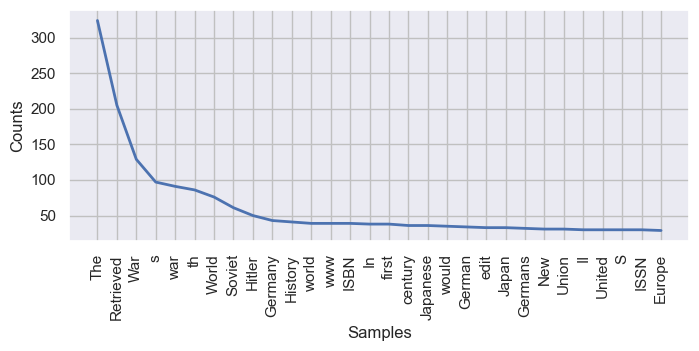

In [23]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

# After substituting all punctuation marks with spaces, the graph now represents a cleaner and more accurate distribution of the words in the text.  The changes observed are mostly in the accuracy of word counts and the clarity of the data presented in the graph.

In [25]:
dist_words_filter_2.most_common(20)

[('The', 324),
 ('Retrieved', 205),
 ('War', 129),
 ('s', 97),
 ('war', 91),
 ('th', 86),
 ('World', 76),
 ('Soviet', 61),
 ('Hitler', 50),
 ('Germany', 43),
 ('History', 41),
 ('world', 39),
 ('www', 39),
 ('ISBN', 39),
 ('In', 38),
 ('first', 38),
 ('century', 36),
 ('Japanese', 36),
 ('would', 35),
 ('German', 34)]

# POS Tags with TextBlob

In [27]:
new_stopwords = ["The", "s", "th", "In", "first", "would", "www", "ISBN"]

In [28]:
filtered = []
for word in tokenized_word_2:
    if word not in new_stopwords:
        filtered.append(word)

In [29]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 31.2 ms
Wall time: 27.9 ms


In [30]:
text

TextBlob("['Key', 'events', 'century', 'WikipediaJump', 'contentMain', 'menuMain', 'menumove', 'sidebarhide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSearchSearchAppearanceCreate', 'accountLog', 'inPersonal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'moreContributionsTalkContentsmove', 'sidebarhide', 'Top', 'Historic', 'events', 'centuryToggle', 'Historic', 'events', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific', 'Background', 'Japanese', 'Expansion', 'Allied', 'offensive

In [31]:
tags_list = text.tags

In [32]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'WikipediaJump", 'NNP'),
 ("'", 'POS'),
 ("'menumove", 'NNP'),
 ("'", 'POS'),
 ("'sidebarhide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSearchSearchAppearanceCreate", 'NNP'),
 ("'", 'POS'),
 ("'accountLog", 'NNP'),
 ("'", 'POS'),
 ("'inPersonal", 'NNP'),
 ("'", 'POS'),
 ("'tools", 'NNS'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 ("'account", 'NNP'),
 ("'", 'POS'),
 ("'Log", 'NNP'),
 ("'", 'POS'),
 ("'Pages", 'NNS'),
 ("'", 'POS'),
 ("'logged", 'VBD'),
 ("'editors", 'NNS'),
 ("'", 'POS'),
 ("'learn", 'NNP'),
 ("'", 'POS')

In [33]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [34]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [35]:
df_t = df_text.groupby('Word type').count().reset_index()

In [36]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,13
3,EX,12
4,FW,43


In [37]:
top10 = df_t.nlargest(10, 'Words')

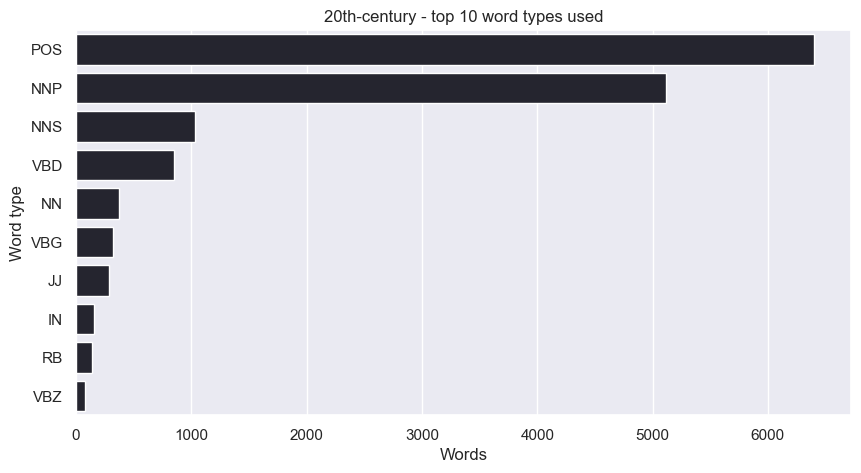

In [38]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title("20th-century - top 10 word types used")

In [39]:
# def word_analysis(word_type):
#     filtered = [row for row in my_list if str(word_type) in row[1]]
#     print("filtered for " + word_type)
#     df = pd.DataFrame(filtered)
#     df.columns = ["Word", "Occurences"]
#     x=df.groupby('Word').count().reset_index()
#     y=x.sort_values(by=['Occurences'], ascending=False)
#     top10=y.nlargest(10, 'Occurences')
#     plt.figure(figsize=(10, 5))
#     sns.barplot(x="Word", y="Occurences", palette="rocket", saturation=0.9, data=top10).set_title("Lord of the rings - most frequently used "+ word_type +" type word")

# Nouns

In [41]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [42]:
top15

,Word,Occurences
1244,'War,129
2581,'war,91
1294,'World,76
1096,'Soviet,61
532,'Hitler,50
531,'History,41
2607,'world,39
1484,'century,36
469,'German,34
1678,'edit,33


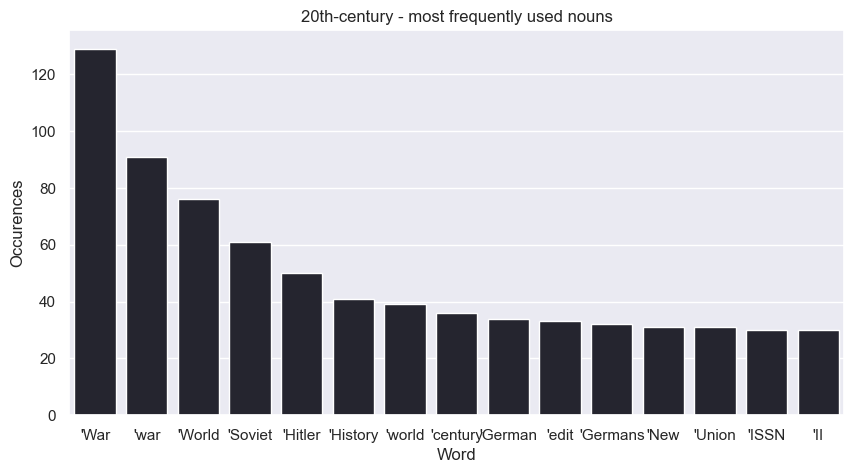

In [43]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("20th-century - most frequently used nouns")

# Verbs

In [45]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [46]:
top15

,Word,Occurences
27,'Retrieved,205
36,'United,30
0,'Allied,19
196,'led,15
316,'used,13
194,'launched,12
1,'Archived,10
93,'controlled,9
161,'forced,8
77,'changed,7


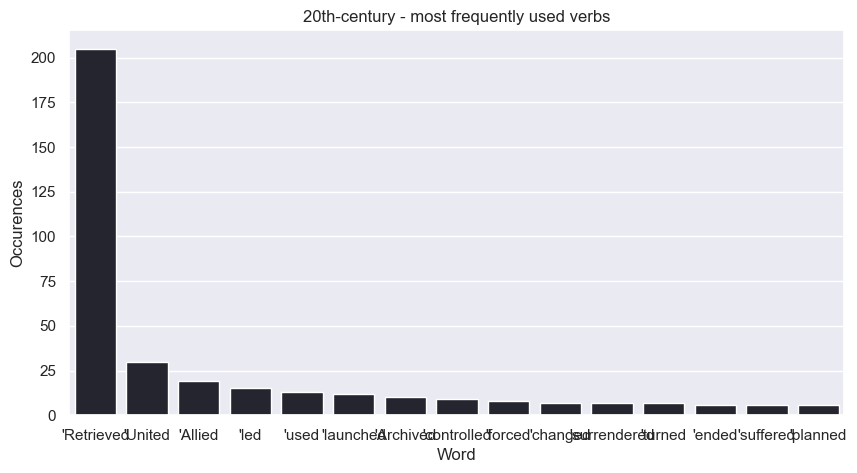

In [47]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15).set_title("20th-century - most frequently used verbs")

# Adjectives

In [49]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

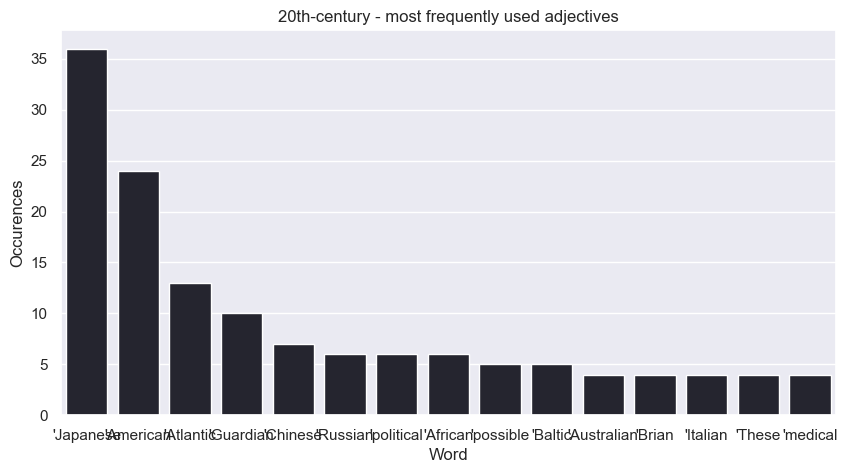

In [50]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top15).set_title("20th-century - most frequently used adjectives")

# The frequency analysis provides a clear indication of the central themes, actions, and descriptors that characterized the twentieth century. The prominence of terms related to conflict, geopolitics, and national identities is consistent with the historical events of the period.

# Create a dataframe with countries

In [53]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century WikipediaJump contentMain menuMain menumove sidebarhide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload fileSearchSearchAppearanceCreate accountLog inPersonal tools Create account Log Pages logged editors learn moreContributionsTalkContentsmove sidebarhide Top Historic events centuryToggle Historic events century subsection world beginning century war end wars World War I Russian Revolution Communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External linksToggle table contentsKey events

In [54]:
# Create a count for the main countries

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [55]:
all_counts

Counter({'Retrieved': 205,
         'War': 129,
         'war': 91,
         'World': 76,
         'Soviet': 61,
         'Hitler': 50,
         'Germany': 43,
         'History': 41,
         'world': 39,
         'century': 36,
         'Japanese': 36,
         'German': 34,
         'edit': 33,
         'Japan': 33,
         'Germans': 32,
         'New': 31,
         'Union': 31,
         'II': 30,
         'United': 30,
         'S': 30,
         'ISSN': 30,
         'Europe': 29,
         'also': 29,
         'became': 27,
         'A': 27,
         'com': 27,
         'U': 26,
         'States': 26,
         'nuclear': 26,
         'Battle': 25,
         'end': 24,
         'American': 24,
         'history': 23,
         'This': 23,
         'attack': 23,
         'weapons': 23,
         'new': 22,
         'Holocaust': 21,
         'Stalin': 21,
         'Africa': 21,
         'British': 20,
         'North': 20,
         'Allied': 19,
         'Allies': 19,
         'many': 1

In [56]:
countries = pd.read_csv("countries_list_20th_century.csv", index_col = 0)

In [57]:
countries['country_name'] = countries['country_name'].str.strip()


In [58]:
print(countries.head())

  country_name
1  Afghanistan
2      Albania
3      Algeria
4      Andorra
5       Angola


In [59]:
# Replace full country names with aliases
countries['country_name'] = countries['country_name'].replace({
    'People\'s Republic of China': 'China',
    'Democratic People\'s Republic of Korea': 'North Korea',
    'Republic of Korea': 'South Korea',
    'United States of America': 'United States',
    'Russian Federation': 'Russia',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Islamic Republic of Iran': 'Iran',
    'Republic of Iraq': 'Iraq',
    'Syrian Arab Republic': 'Syria',
    'Republic of Turkey': 'Turkey',
    'Republic of the Sudan': 'Sudan',
    'Republic of South Sudan': 'South Sudan',
    'Vatican City (Holy See)': 'Vatican City',
    'Czech Republic': 'Czechia',
    'Ivory Coast': 'Côte d\'Ivoire',
    'Micronesia, Federated States of': 'Micronesia',
    'Timor-Leste': 'East Timor',
    'Lao People\'s Democratic Republic': 'Laos',
    'The Gambia': 'Gambia',
    'Myanmar (Burma)': 'Myanmar',
    'Bosnia and Herzegovina': 'Bosnia',
    'Brunei Darussalam': 'Brunei',
    'Republic of Moldova': 'Moldova',
    'Republic of the Congo': 'Congo (Brazzaville)',
    'Democratic Republic of the Congo': 'Congo (Kinshasa)',
    'São Tomé and Príncipe': 'Sao Tome and Principe'})

In [60]:
countries_list = countries['country_name'].to_list()

In [61]:
dict_of_counts = {d : all_counts[d] for d in countries_list}

In [62]:
dict_of_counts

{'Afghanistan': 1,
 'Albania': 2,
 'Algeria': 1,
 'Andorra': 0,
 'Angola': 1,
 'Antigua and Barbuda': 0,
 'Argentina': 0,
 'Armenia': 0,
 'Australia': 2,
 'Austria': 5,
 'Azerbaijan': 0,
 'Bahamas, The': 0,
 'Bahrain': 0,
 'Bangladesh': 2,
 'Barbados': 0,
 'Belarus': 1,
 'Belgium': 2,
 'Belize': 0,
 'Benin': 0,
 'Bhutan': 0,
 'Bolivia': 0,
 'Bosnia': 1,
 'Botswana': 0,
 'Brazil': 0,
 'Brunei': 0,
 'Bulgaria': 2,
 'Burkina Faso': 0,
 'Burundi': 0,
 'Cambodia': 2,
 'Cameroon': 0,
 'Canada': 2,
 'Cape Verde': 0,
 'Central African Republic': 0,
 'Chad': 0,
 'Chile': 0,
 "China, People's Republic of": 0,
 'Colombia': 0,
 'Comoros': 0,
 'Congo, Democratic Republic of the': 0,
 'Congo, Republic of the': 0,
 'Costa Rica': 0,
 'Croatia': 0,
 'Cuba': 3,
 'Cyprus': 0,
 'Czechia': 0,
 'Denmark': 3,
 'Djibouti': 0,
 'Dominica': 0,
 'Dominican Republic': 0,
 'East Timor': 0,
 'Ecuador': 0,
 'Egypt': 2,
 'El Salvador': 0,
 'Equatorial Guinea': 0,
 'Eritrea': 0,
 'Estonia': 2,
 'Eswatini': 0,
 'Ethiop

In [63]:
# Search for the countries from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}  
df = pd.DataFrame(dct)

In [64]:
df

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Donetsk People's Republic,Kosovo,Luhansk People's Republic,Niue,Northern Cyprus,Sahrawi Arab Democratic Republic,Somaliland,South Ossetia,Taiwan,Transnistria
0,1,2,1,0,1,0,0,0,2,5,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df = df.transpose().reset_index()

In [66]:
df.dtypes

index    object
0         int64
dtype: object

In [67]:
df

,index,0
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [68]:
df.rename(columns = {"index":"Countries", 0:"Times mentioned"}, inplace = True)

In [69]:
df

,Countries,Times mentioned
0,Afghanistan,1
1,Albania,2
2,Algeria,1
3,Andorra,0
4,Angola,1
...,...,...
203,Sahrawi Arab Democratic Republic,0
204,Somaliland,0
205,South Ossetia,0
206,Taiwan,0


In [70]:
df.shape

(208, 2)

In [71]:
df_sorted = df.sort_values(by='Times mentioned', ascending=False)

In [72]:
top_20_countries = df_sorted.head(20)

In [73]:
print(top_20_countries)

       Countries  Times mentioned
64       Germany               43
85         Japan               33
60        France               16
82         Italy               14
191      Vietnam               13
140       Poland               13
144       Russia               10
76         India                9
130       Norway                5
9        Austria                5
139  Philippines                5
99         Libya                5
81        Israel                4
78          Iran                4
69        Guinea                4
66        Greece                4
132     Pakistan                4
59       Finland                4
101    Lithuania                3
143      Romania                3


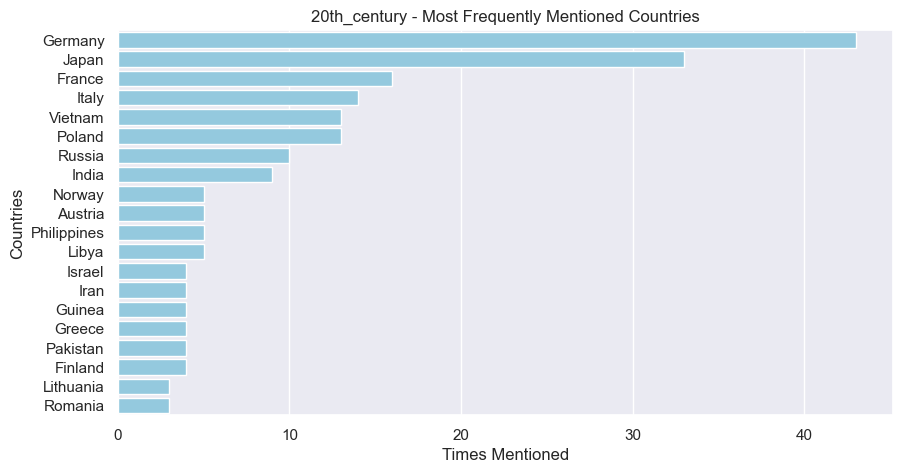

In [74]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Times mentioned", y="Countries", data=top_20_countries, color="skyblue")
plt.title("20th_century - Most Frequently Mentioned Countries")
plt.xlabel("Times Mentioned")
plt.ylabel("Countries")
plt.show()

In [78]:
top_20_countries.to_csv("countries_list.csv")